# Assignment Day 12 :
1. Gunakan data iris.csv
2. Jawablah poin-poin assignment yang tertera dibawah

In [ ]:
import pandas as pd
import numpy as np
import scipy
import warnings
warnings.filterwarnings("ignore")

# Plotting Usage
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Rename feature column
df = df.rename(columns={'sepal length (cm)': 'sepal_length',
                        'sepal width (cm)': 'sepal_width',
                        'petal length (cm)': 'petal_length',
                        'petal width (cm)': 'petal_width'})

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.shape

(150, 5)

## 1. Assignment EDA
Visualisasi di tiap plot numerik, dan tulis insight yang didapat **(point 15)**

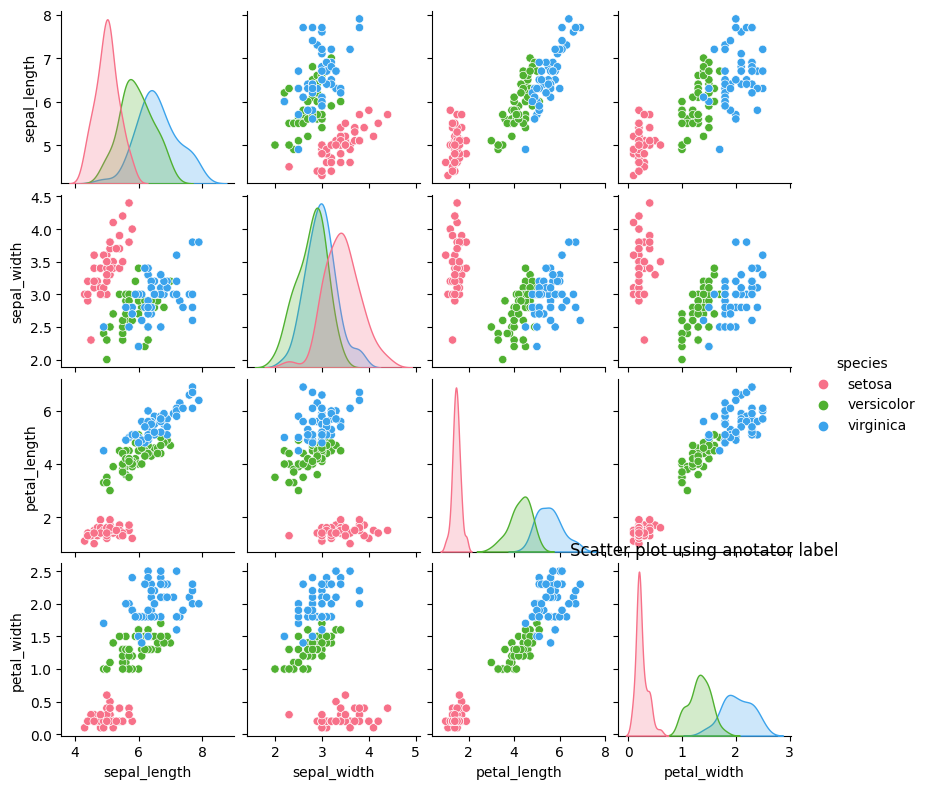

In [ ]:
sns.pairplot(df, hue="species", palette="husl", height=2, aspect=1)
plt.title('Scatter plot using anotator label')
plt.show()

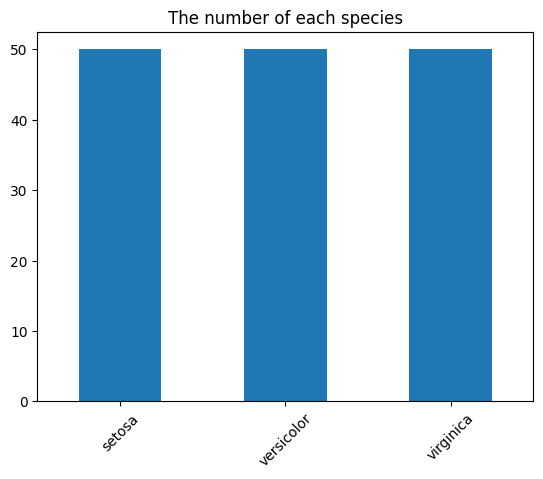

In [ ]:
# Create bar graph for species column

jml_category = df.species.value_counts()
jml_category.plot(kind='bar')
plt.xticks(rotation=45) # Rotate x-labels
plt.title('The number of each species')
plt.show()

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


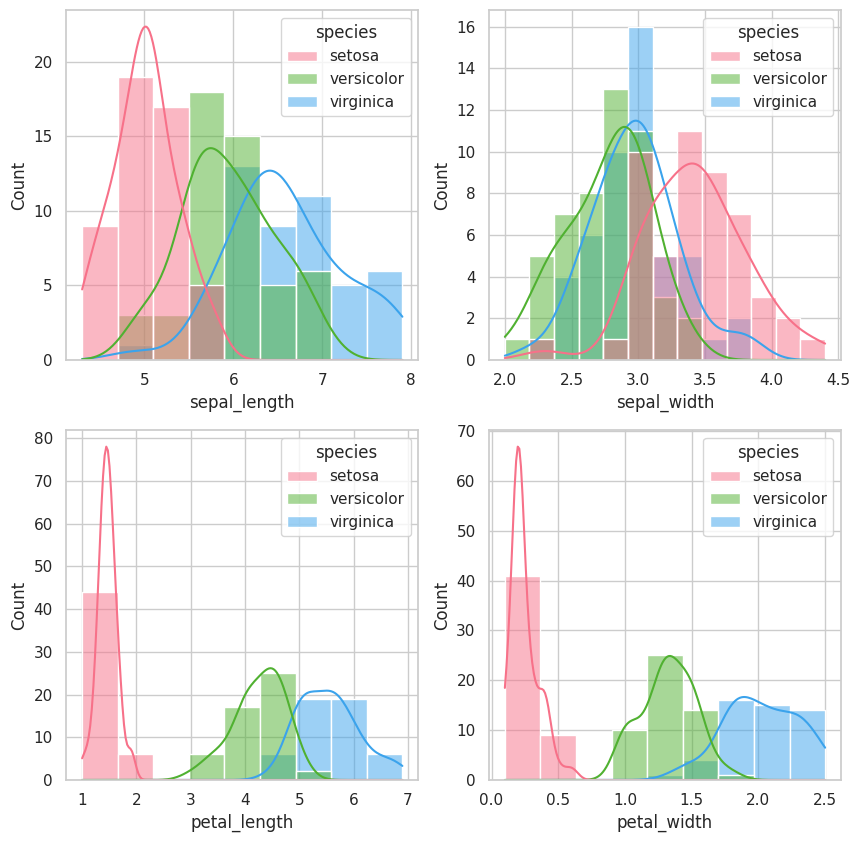

In [ ]:
# Create histogram per features
sns.set(style='whitegrid')
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=df, x='sepal_length', hue='species', kde=True, ax=axs[0, 0], palette="husl")
sns.histplot(data=df, x='sepal_width', hue='species', kde=True, ax=axs[0, 1], palette="husl")
sns.histplot(data=df, x='petal_length', hue='species', kde=True, ax=axs[1, 0], palette="husl")
sns.histplot(data=df, x='petal_width', hue='species', kde=True, ax=axs[1, 1], palette="husl")

plt.show()

### Interpretasi Insight
According to describe result, the value difference between mean and 50% (median) indicated:
1. Sepal length tends to be more central tendency
2. Sepal width tends to be more central tendency
3. Petal length tends to be more central tendency
4. Petal width tends to be more central tendency

## 2. Assignment Feature Engineering (Poin 15)
1. Drop duplikat
2. Outlier Handling (Silahkan bisa dilakukan bisa tidak, cantumkan alasan saudara jika menggunakan teknik outlier handling)
3. Feature Scalling (Pilih salah satu : MinMaxScaller atau Standar Scaller)

# Check Duplicated Data

In [ ]:
# Duplicated data check
df.duplicated().sum()

1

In [ ]:
# Drop Duplicated data
df = df.drop_duplicates()

In [ ]:
# Check the total row after removing duplicated data
df.shape

(149, 5)

# Check Outlier

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


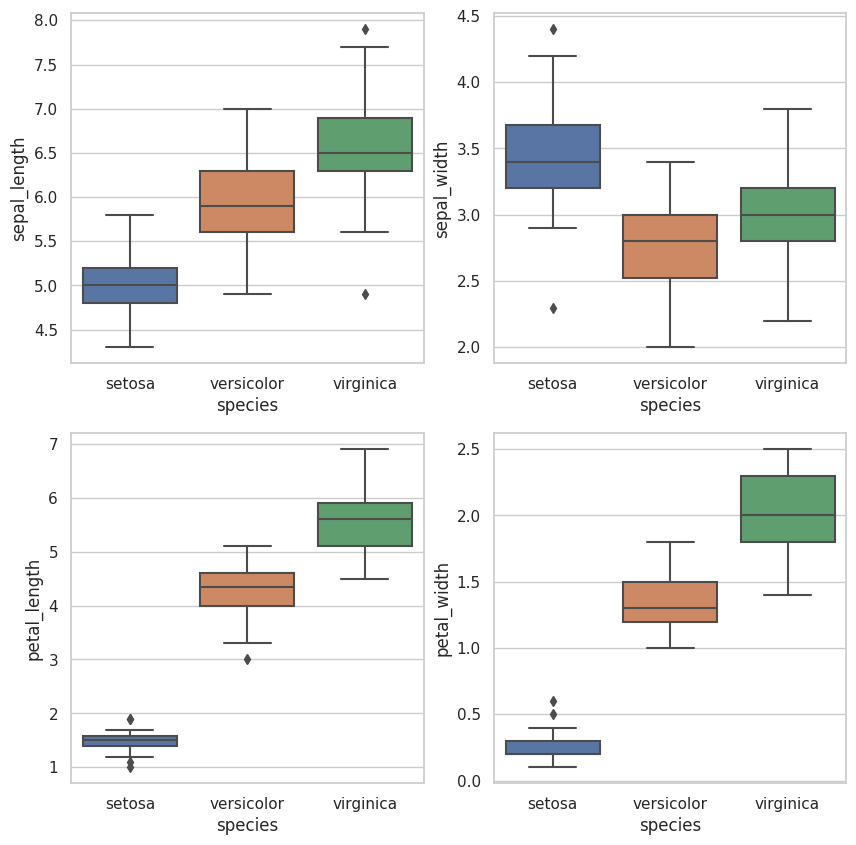

In [ ]:
# Create boxplot per features

sns.set(style='whitegrid')
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(x='species', y='sepal_length', data=df, ax=axs[0, 0])
sns.boxplot(x='species', y='sepal_width', data=df, ax=axs[0, 1])
sns.boxplot(x='species', y='petal_length', data=df, ax=axs[1, 0])
sns.boxplot(x='species', y='petal_width', data=df, ax=axs[1, 1])

plt.show()

According to the boxplot above, outliers are detected in the three different species; setosa, versicolor and virginica. However, the distribution tends to be more normal.

Examining further, histrogram visualization will be conducted.

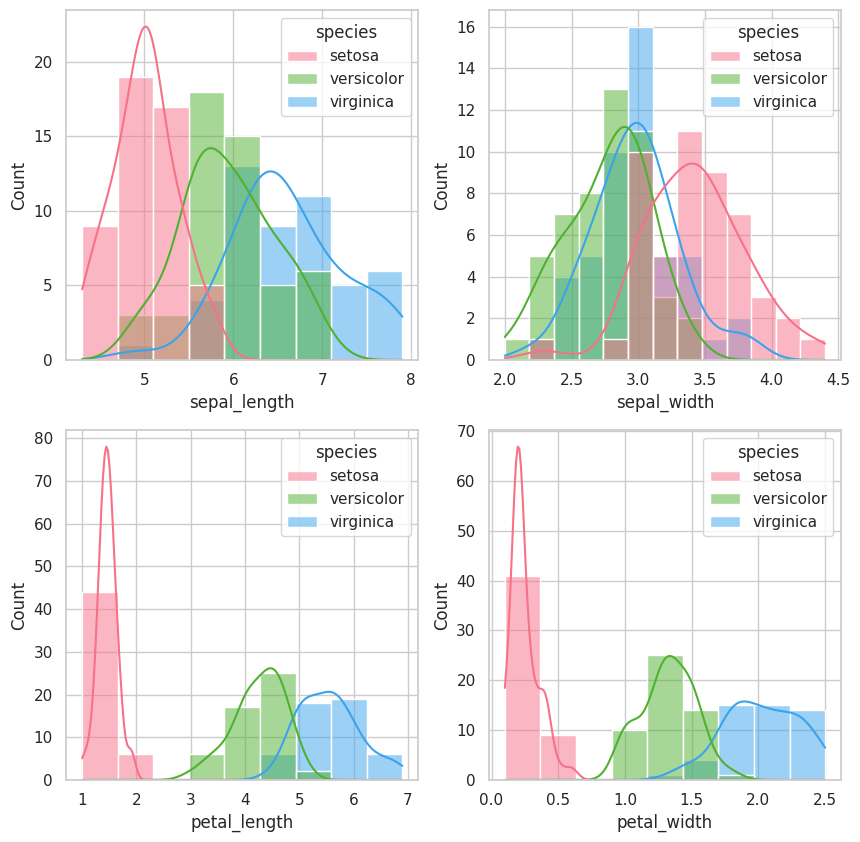

In [ ]:
# Create histogram per features to check again the distribution
sns.set(style='whitegrid')
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=df, x='sepal_length', hue='species', kde=True, ax=axs[0, 0], palette="husl")
sns.histplot(data=df, x='sepal_width', hue='species', kde=True, ax=axs[0, 1], palette="husl")
sns.histplot(data=df, x='petal_length', hue='species', kde=True, ax=axs[1, 0], palette="husl")
sns.histplot(data=df, x='petal_width', hue='species', kde=True, ax=axs[1, 1], palette="husl")

plt.show()

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The histogram output and describe info also show that the data still has central distribution although some outliers are indicated in the boxplot. Therefore, the outlier will not be removed in this case.

# Feature Scaling

In [ ]:
fitur_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[fitur_columns].values
y = df['species'].values

In [ ]:
# Feature Scalling
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
df_scalling = pd.DataFrame(data = X_std, columns = fitur_columns)
df_scalling.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02
mean,1.049124e-15,1.669060e-16,-1.430623e-16,-4.768743e-16
std,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00
min,-1.864149e+00,-2.436862e+00,-1.560289e+00,-1.440192e+00
25%,-8.980334e-01,-5.972549e-01,-1.219738e+00,-1.177055e+00
50%,-5.268246e-02,-1.373532e-01,3.127435e-01,1.386329e-01
75%,6.719041e-01,5.524994e-01,7.668121e-01,7.964768e-01
max,2.483370e+00,3.081959e+00,1.788466e+00,1.717458e+00


In [ ]:
df_scalling

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624
...,...,...,...,...
144,1.034197,-0.137353,0.823571,1.454321
145,0.551140,-1.287108,0.710054,0.928046
146,0.792668,-0.137353,0.823571,1.059614
147,0.430375,0.782450,0.937088,1.454321


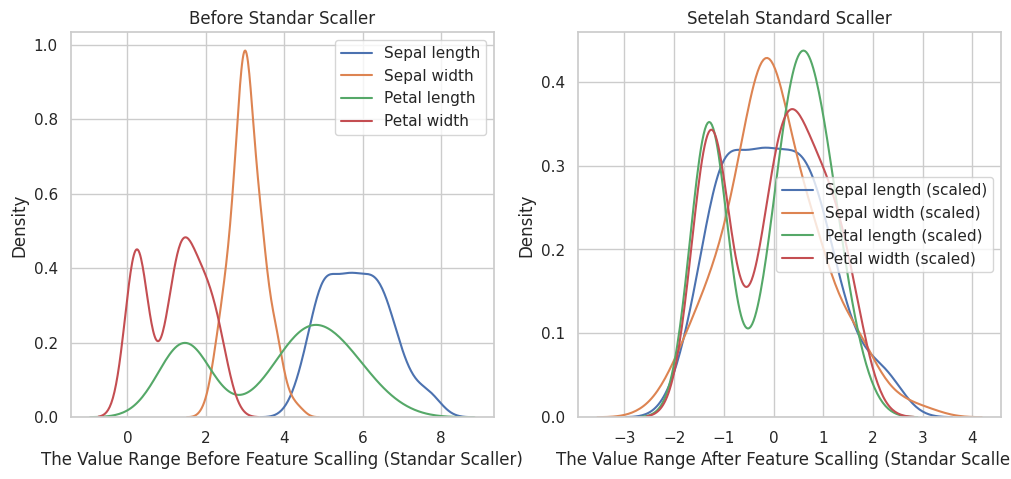

In [ ]:
# Check the graphs after and before scalling
# Spot the distribution from features after and before standar scaller

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot the distribution before Standar Scaler
ax1.set_title('Before Standar Scaller')
sns.kdeplot(df['sepal_length'], ax=ax1, label='Sepal length')
sns.kdeplot(df['sepal_width'], ax=ax1, label='Sepal width')
sns.kdeplot(df['petal_length'], ax=ax1, label='Petal length')
sns.kdeplot(df['petal_width'], ax=ax1, label='Petal width')

# Plot the distribution after Standar Scaler (Isi dibawah ini)
ax2.set_title('Setelah Standard Scaller')
sns.kdeplot(df_scalling['sepal_length'], ax=ax2, label='Sepal length (scaled)')
sns.kdeplot(df_scalling['sepal_width'], ax=ax2, label='Sepal width (scaled)')
sns.kdeplot(df_scalling['petal_length'], ax=ax2, label='Petal length (scaled)')
sns.kdeplot(df_scalling['petal_width'], ax=ax2, label='Petal width (scaled)')

# Set x-labels
ax1.set_xlabel('The Value Range Before Feature Scalling (Standar Scaller)')
ax2.set_xlabel('The Value Range After Feature Scalling (Standar Scaller)')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

## 3. Assignment K-Means (Point 25)
1. Elbow Method **(point 10)**
2. Via Score Plot **(point 10)**
3. Evaluasi model **(Point 5)**
### 1. Elbow Method

Text(0, 0.5, 'Intertia / WSS')

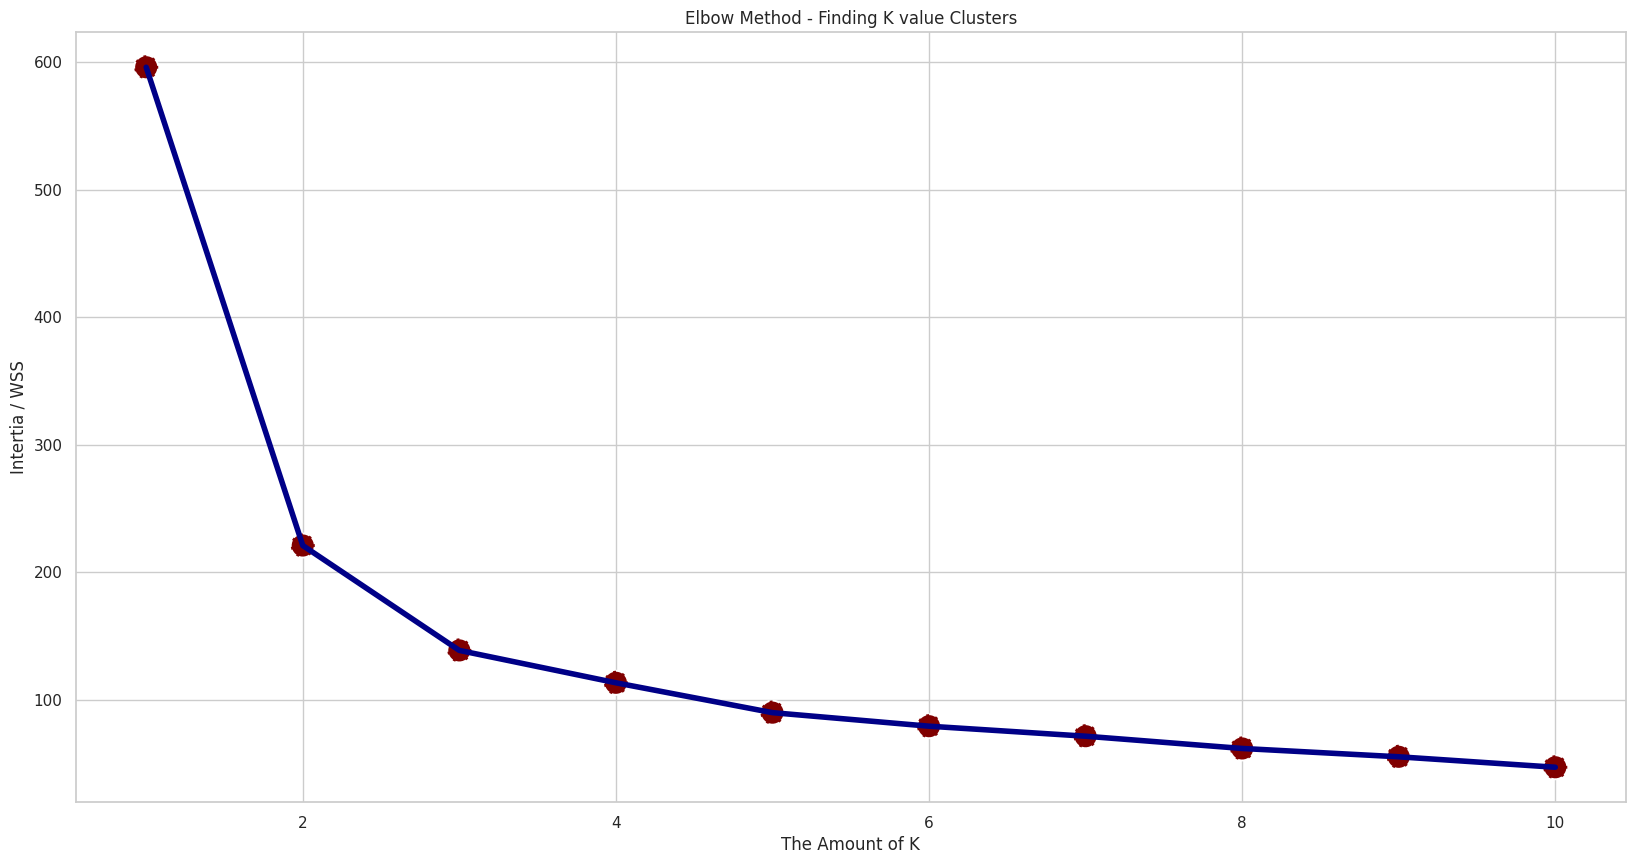

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_scalling.values)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.title('Elbow Method - Finding K value Clusters')
plt.xlabel('The Amount of K')
plt.ylabel('Intertia / WSS')

In [ ]:
# According to the elbow graph output, the amount of chosen K is 3 ,
# due to the first point before the following points has a constant gap or
# a point after the shape curve before flattening out
from sklearn.cluster import KMeans
kmeans_elbow = KMeans(n_clusters=3, random_state=0)
kmeans_elbow.fit(df_scalling.values)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# Put the k-means outcome using elbow method to cluster_elbow column
df['cluster_elbow'] = kmeans_elbow.labels_

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_elbow
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


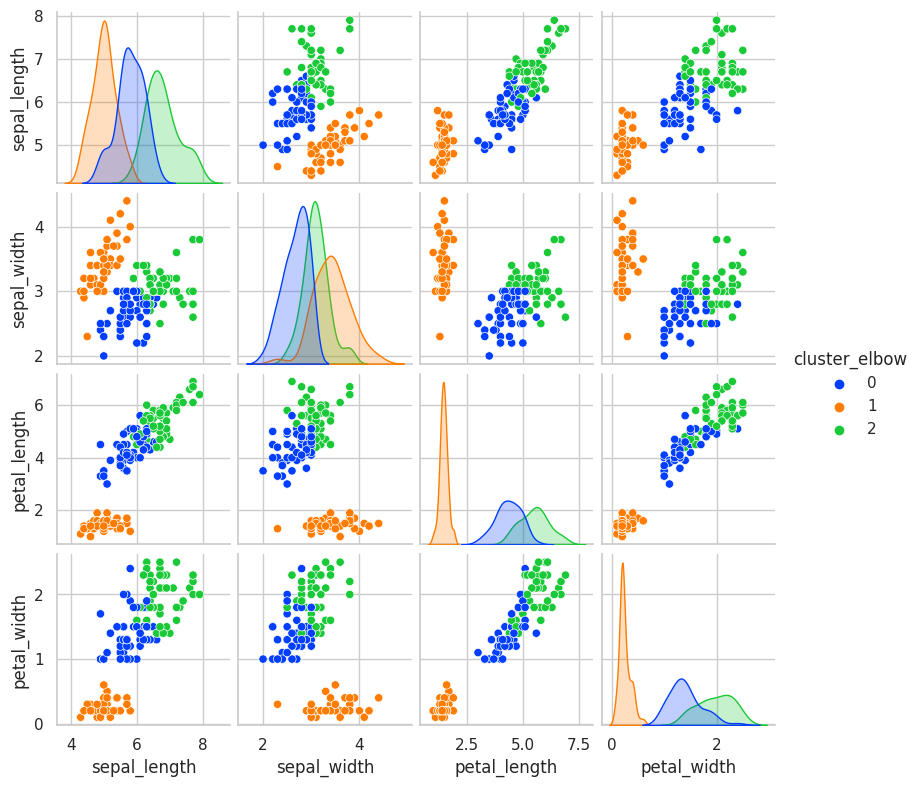

In [ ]:
sns.pairplot(df, hue="cluster_elbow", palette="bright", height=2, aspect=1)
plt.show()

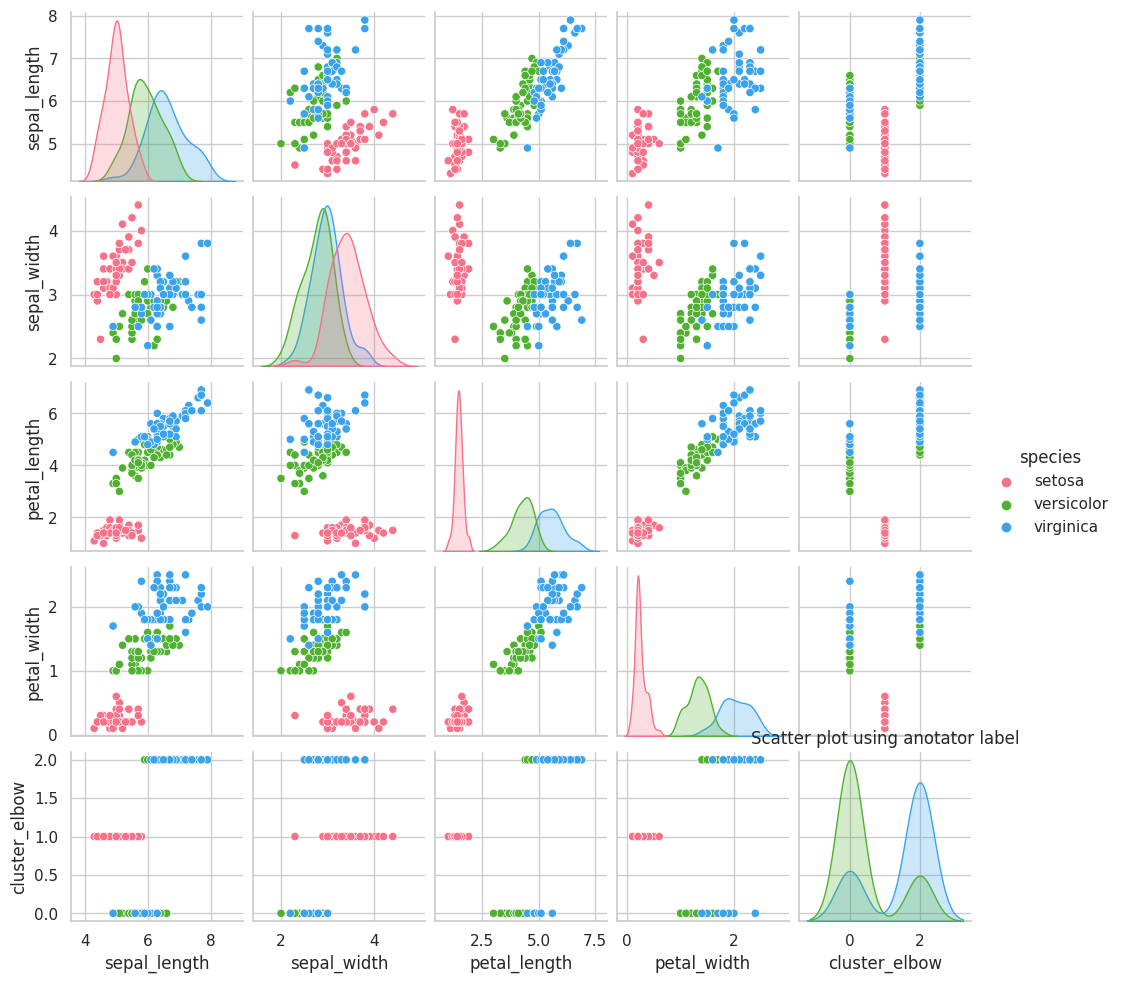

In [ ]:
sns.pairplot(df, hue="species", palette="husl", height=2, aspect=1)
plt.title('Scatter plot using anotator label')
plt.show()

### The scatter plot outcome above (using elbow method) is optimal due to the cluster match with anotator label. Condition:
1. Cluster 0 -> versicolor
2. Cluster 1 -> setosa
3. Cluster 2 -> virginica


### 2. Via Score Plot

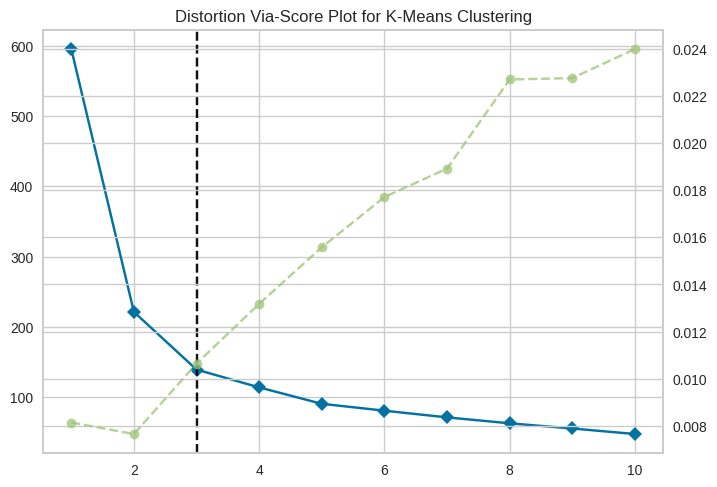

In [ ]:
# Via Score Plot
from yellowbrick.cluster import KElbowVisualizer
k_means_via = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(k_means_via, k=(1,11), timings= True)
visualizer.fit(df_scalling.values)        # Fit the data to the visualizer
plt.title('Distortion Via-Score Plot for K-Means Clustering')
plt.show()

In [ ]:
# According to the curve above, the chosen K is 3,
# due to the distortion point meet in the number 3 of x-axis
from sklearn.cluster import KMeans
kmeans_via = KMeans(n_clusters=3, random_state=0)
kmeans_via.fit(df_scalling.values)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# Put the k-means outcome using via score method to cluster_via column
df['cluster_via'] = kmeans_via.labels_

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_elbow,cluster_via
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2,2
146,6.3,2.5,5.0,1.9,virginica,0,0
147,6.5,3.0,5.2,2.0,virginica,2,2
148,6.2,3.4,5.4,2.3,virginica,2,2


**Evaluation**

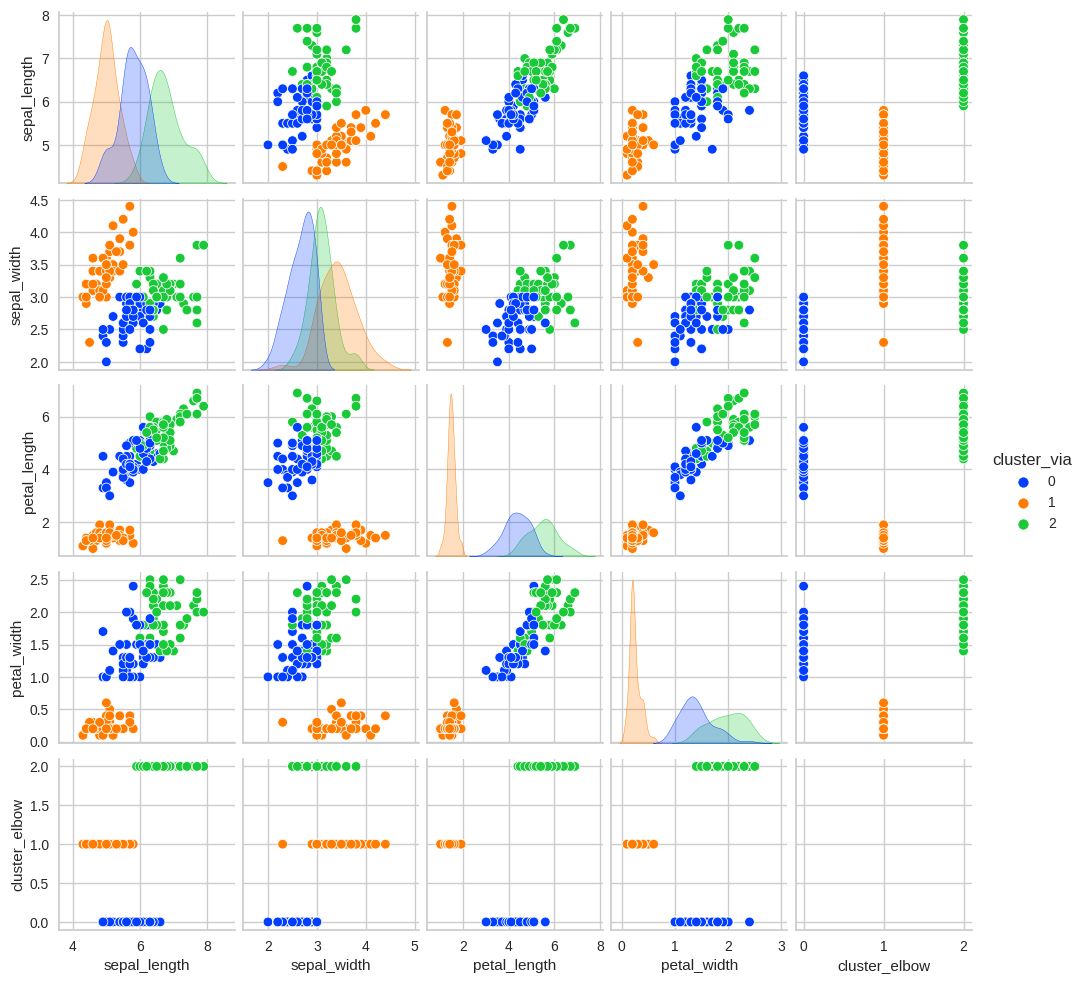

In [ ]:
sns.pairplot(df, hue="cluster_via", palette="bright", height=2, aspect=1)
plt.show()

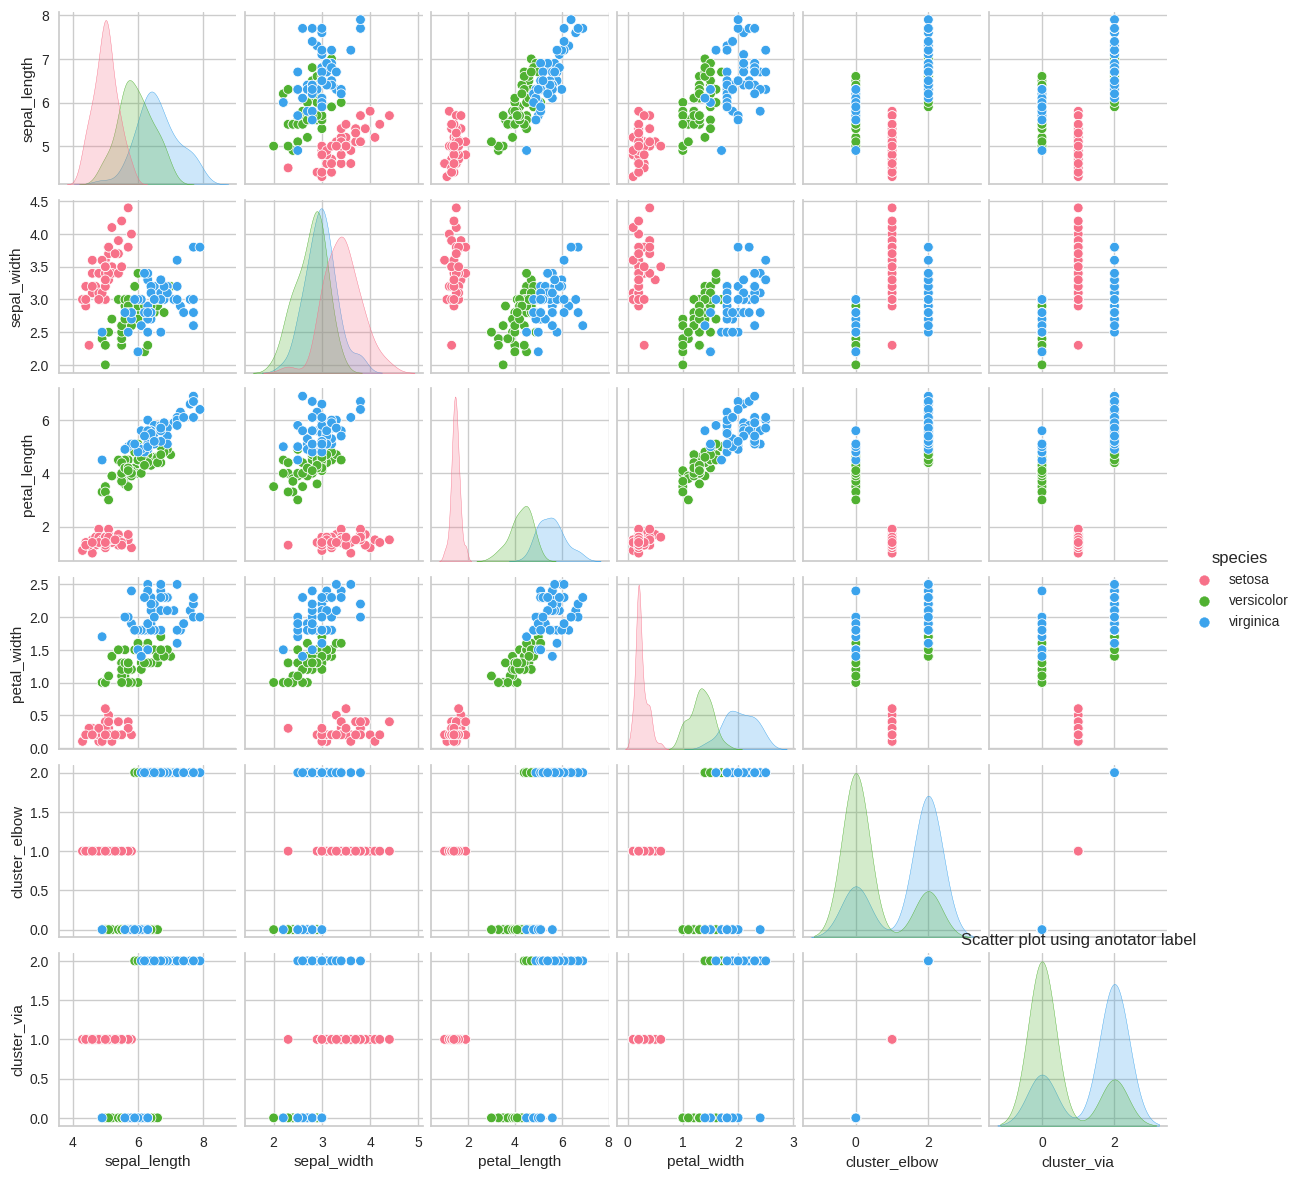

In [ ]:
# Compared to the anatator label
sns.pairplot(df, hue="species", palette="husl", height=2, aspect=1)
plt.title('Scatter plot using anotator label')
plt.show()

### The scatter plot outcome above (using via score method) is optimal due to the cluster match with anotator label. Condition:
1. Cluster 0 -> versicolor
2. Cluster 1 -> setosa
3. Cluster 2 -> virginica

## 4. Assignment Multiclass (Point 25)
1. gunakan : Logistic Regression, Naive Bayes, KNN, SVM **(point 10)**
2. gunakan parameter model berbeda (parameter model dibahas di day 8) atau default (poin plus jika menggunakan parameter model berbeda) **(point 10)**
3. Evaluasi model **(point 5)**

### Referensi parameter model :
1. KNN : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
2. Logistic Regression : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
3. SVM : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
4. Naive Bayes : https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_elbow,cluster_via
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1


In [ ]:
df.cluster_elbow.value_counts(normalize=True)
#balances

0    0.348993
1    0.335570
2    0.315436
Name: cluster_elbow, dtype: float64

In [ ]:
df.cluster_via.value_counts(normalize=True)
#balances

0    0.348993
1    0.335570
2    0.315436
Name: cluster_via, dtype: float64

In [ ]:
df_multi = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species','cluster_elbow']]
df_multi.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_elbow
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [ ]:
# Memisahkan features dan target
X = df_multi.drop(["cluster_elbow", 'species'], axis = 1)
y = df["cluster_elbow"]
print(X.shape, y.shape)

(149, 4) (149,)


In [ ]:
# Split Training and Testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=df_multi.cluster_elbow)

In [ ]:
# Cek jumlah data masing-masing subset
print('Data Training: X', X_train.shape, 'Y', y_train.shape)
print('Data Test: X', X_test.shape, 'Y', y_test.shape)

Data Training: X (119, 4) Y (119,)
Data Test: X (30, 4) Y (30,)


# 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.metrics import accuracy_score, classification_report #Evaluation matrix

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train.values.ravel())
lr_pred_train = lr_model.predict(X_train)
lr_pred_test = lr_model.predict(X_test)

# Evaluasi model
print("Logistic Regression:")
print("Accuracy train:", accuracy_score(y_train, lr_pred_train))
print("Accuracy test:", accuracy_score(y_test, lr_pred_test))
print(classification_report(y_test, lr_pred_test))

Logistic Regression:
Accuracy train: 0.9915966386554622
Accuracy test: 0.9666666666666667
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      1.00      1.00        10
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# 2. SVM (SVC)


In [ ]:
from sklearn.svm import SVC

# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train.values.ravel())
svm_pred_train = svm_model.predict(X_train)
svm_pred_test = svm_model.predict(X_test)

# Evaluasi model
print("SVM:")
print("Accuracy train:", accuracy_score(y_train, svm_pred_train))
print("Accuracy test:", accuracy_score(y_test, svm_pred_test))
print(classification_report(y_test, svm_pred_test))

SVM:
Accuracy train: 0.9663865546218487
Accuracy test: 0.9
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      1.00      1.00        10
           2       1.00      0.67      0.80         9

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



# 3. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.values.ravel())
nb_pred_train = nb_model.predict(X_train)
nb_pred_test = nb_model.predict(X_test)

print("\nNaive Bayes:")
print("Accuracy train:", accuracy_score(y_train, nb_pred_train))
print("Accuracy test:", accuracy_score(y_test, nb_pred_test))
print(classification_report(y_test, nb_pred_test))


Naive Bayes:
Accuracy train: 0.9831932773109243
Accuracy test: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       1.00      1.00      1.00        10
           2       0.75      0.67      0.71         9

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30



# 4. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train.values.ravel())
knn_pred_train = knn_model.predict(X_train)
knn_pred_test = knn_model.predict(X_test)

print("KNN:")
print("Accuracy train:", accuracy_score(y_train, knn_pred_train))
print("Accuracy test:", accuracy_score(y_test, knn_pred_test))
print(classification_report(y_test, knn_pred_test))

KNN:
Accuracy train: 0.9915966386554622
Accuracy test: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       1.00      1.00      1.00        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



The output of Multiclass methods illustrate that the best technique is **Logistic Regression** as the gap between train and test accuracy is a mere 3%

Evaluating to anatator label, Logistic Regression will be employed.

# Distribution of prediction result of Logistic Regression to the anatator label

In [ ]:
df_multi

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_elbow
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
60,5.0,2.0,3.5,1.0
50,7.0,3.2,4.7,1.4
23,5.1,3.3,1.7,0.5
91,6.1,3.0,4.6,1.4
93,5.0,2.3,3.3,1.0
...,...,...,...,...
36,5.5,3.5,1.3,0.2
95,5.7,3.0,4.2,1.2
132,6.4,2.8,5.6,2.2
128,6.4,2.8,5.6,2.1


In [ ]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
27,5.2,3.5,1.5,0.2
99,5.7,2.8,4.1,1.3
137,6.4,3.1,5.5,1.8
61,5.9,3.0,4.2,1.5
145,6.7,3.0,5.2,2.3
34,4.9,3.1,1.5,0.2
13,4.3,3.0,1.1,0.1
89,5.5,2.5,4.0,1.3
122,7.7,2.8,6.7,2.0
1,4.9,3.0,1.4,0.2


In [ ]:
y_train

60     0
50     2
23     1
91     0
93     0
      ..
36     1
95     0
132    2
128    2
63     0
Name: cluster_elbow, Length: 119, dtype: int32

In [ ]:
y_test

27     1
99     0
137    2
61     0
145    2
34     1
13     1
89     0
122    2
1      1
79     0
114    0
74     0
7      1
75     2
81     0
46     1
69     0
76     2
149    0
16     1
131    2
134    0
64     0
6      1
19     1
65     2
107    2
129    2
43     1
Name: cluster_elbow, dtype: int32

In [ ]:
#hasil prediksi logistic regression pada train dan test
lr_pred_train

array([0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 0, 1, 0, 1, 0,
       2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2,
       0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1,
       0, 0, 0, 0, 1, 0, 2, 2, 0], dtype=int32)

In [ ]:
lr_pred_test

array([1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2,
       0, 0, 1, 1, 2, 2, 2, 1], dtype=int32)

Check visualization in data train

In [ ]:
# Jika lr_pred_train merupakan numpy array, dapat dikonversi ke DataFrame seperti ini:
lr_pred_train_df = pd.DataFrame(data=lr_pred_train, columns=['prediksi_ml'])
lr_pred_train_df

,prediksi_ml
0,0
1,2
2,1
3,0
4,0
...,...
114,1
115,0
116,2
117,2


In [ ]:
# Reset index pada DataFrame train
train_reset_index = train.reset_index(drop=True)


# Concatenate DataFrame prediksi_ml dengan DataFrame train yang telah di-reset index
train = pd.concat([train_reset_index, lr_pred_train_df], axis=1)



In [ ]:
train

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_elbow,prediksi_ml
0,5.0,2.0,3.5,1.0,versicolor,0,0
1,7.0,3.2,4.7,1.4,versicolor,2,2
2,5.1,3.3,1.7,0.5,setosa,1,1
3,6.1,3.0,4.6,1.4,versicolor,0,0
4,5.0,2.3,3.3,1.0,versicolor,0,0
...,...,...,...,...,...,...,...
114,5.5,3.5,1.3,0.2,setosa,1,1
115,5.7,3.0,4.2,1.2,versicolor,0,0
116,6.4,2.8,5.6,2.2,virginica,2,2
117,6.4,2.8,5.6,2.1,virginica,2,2


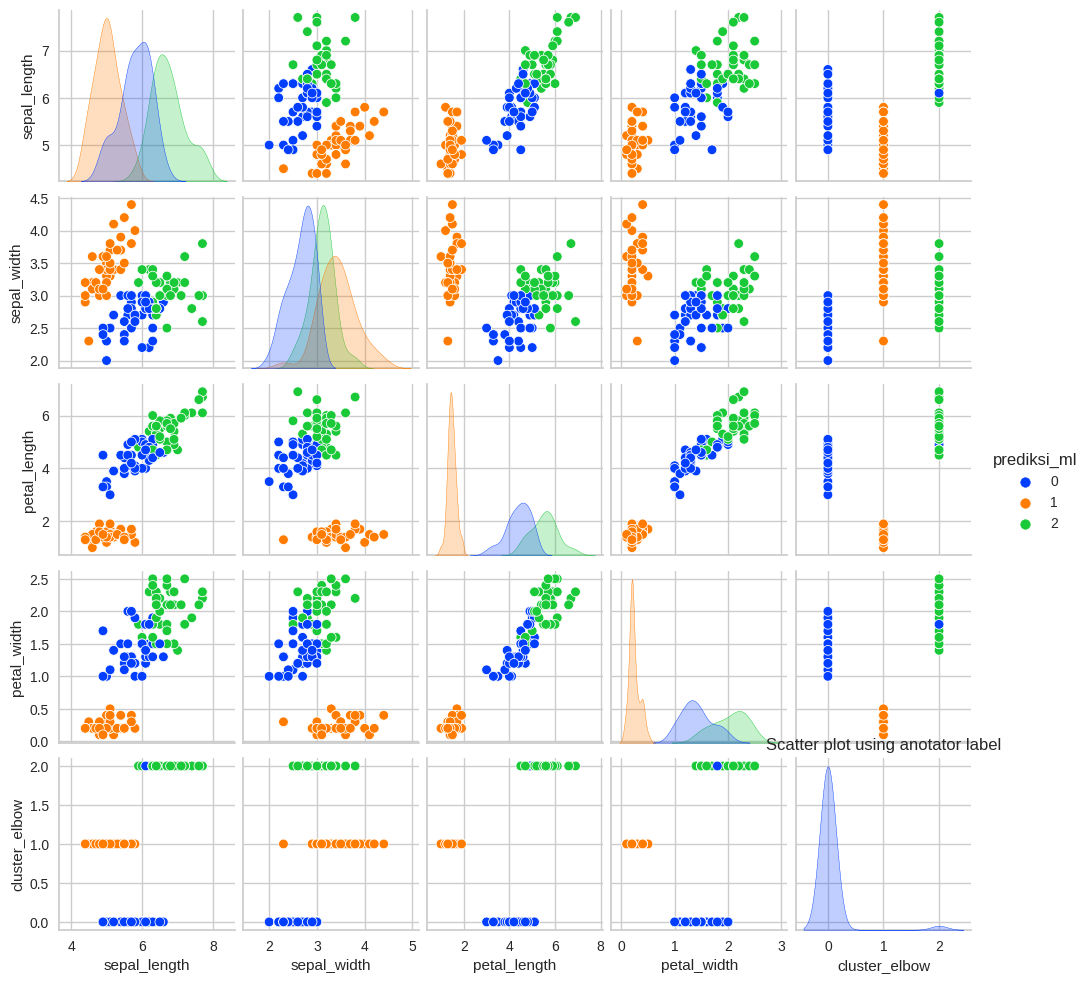

In [ ]:
sns.pairplot(data=train, hue="prediksi_ml", palette="bright", height=2, aspect=1)
plt.show()

Compared to the anatator

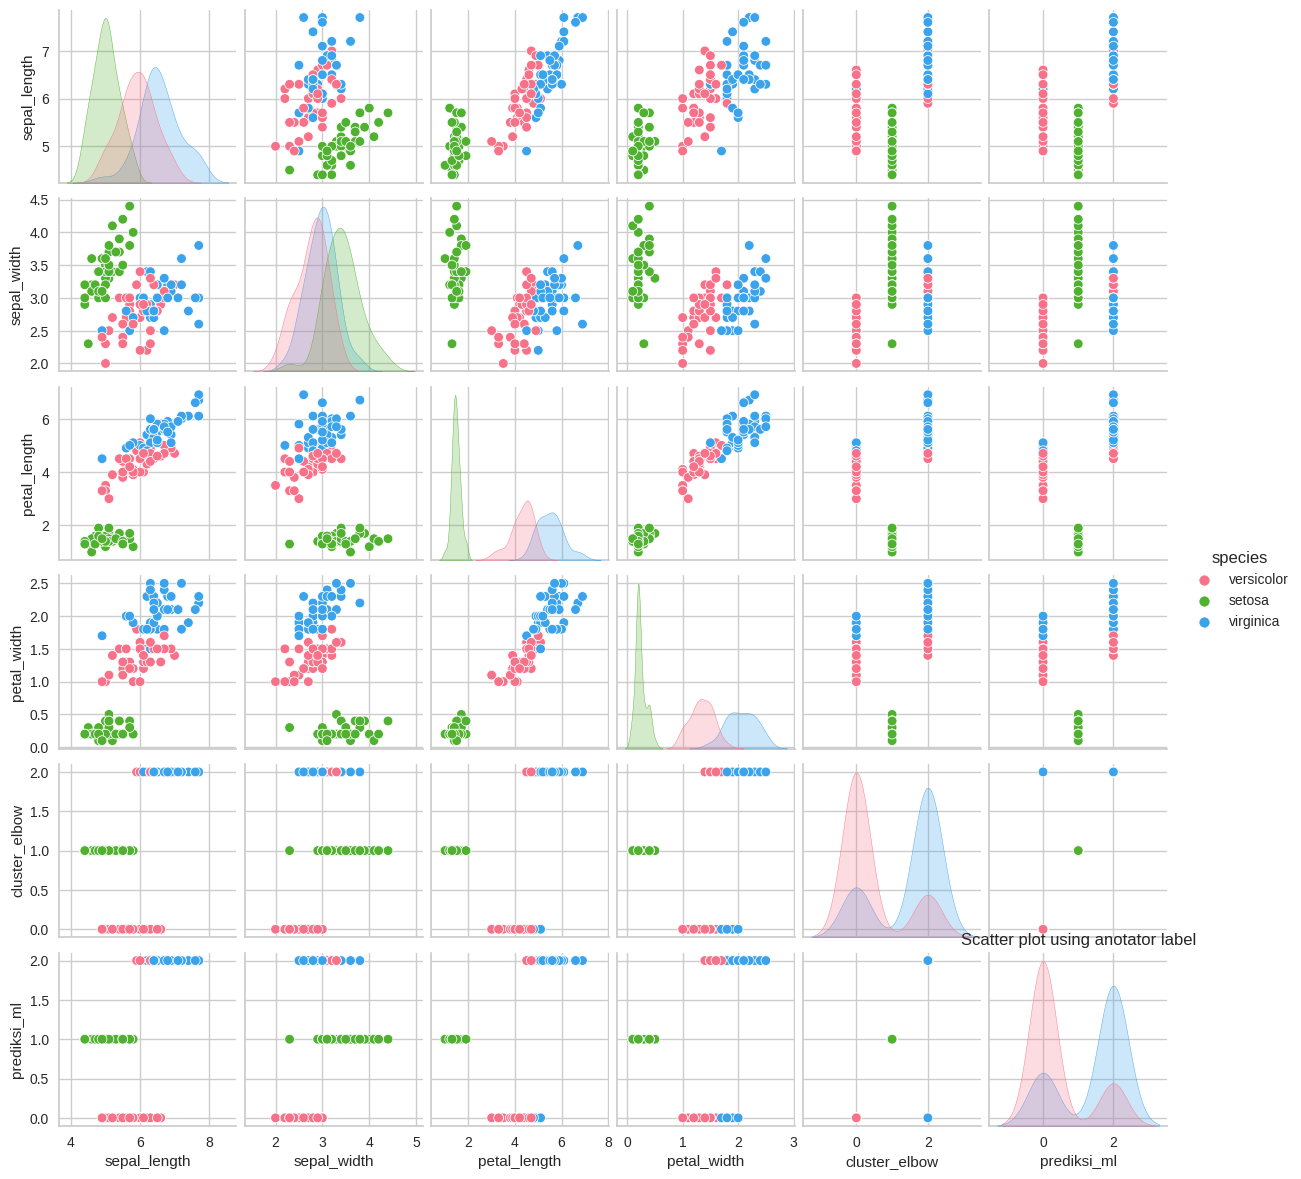

In [ ]:
sns.pairplot(data=train, hue="species", palette="husl", height=2, aspect=1)
plt.title('Scatter plot using anotator label')
plt.show()

According to the visualization above on the data train, it shows that there are indeed some points mixed to other species, however, the value of prediksi_ml prediction has classified amongst the species. It indicates that the prediction has shown good output.

Check Visualization in the data test

In [ ]:
# Jika lr_pred_test merupakan numpy array, dapat dikonversi ke DataFrame seperti ini:
lr_pred_test_df = pd.DataFrame(data=lr_pred_test, columns=['prediksi_ml'])
lr_pred_test_df

,prediksi_ml
0,1
1,0
2,2
3,0
4,2
5,1
6,1
7,0
8,2
9,1


In [ ]:
# Reset index pada DataFrame train
test_reset_index = test.reset_index(drop=True)


# Concatenate DataFrame prediksi_ml dengan DataFrame train yang telah di-reset index
test = pd.concat([test_reset_index, lr_pred_test_df], axis=1)

In [ ]:
test

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_elbow,prediksi_ml
0,5.2,3.5,1.5,0.2,setosa,1,1
1,5.7,2.8,4.1,1.3,versicolor,0,0
2,6.4,3.1,5.5,1.8,virginica,2,2
3,5.9,3.0,4.2,1.5,versicolor,0,0
4,6.7,3.0,5.2,2.3,virginica,2,2
5,4.9,3.1,1.5,0.2,setosa,1,1
6,4.3,3.0,1.1,0.1,setosa,1,1
7,5.5,2.5,4.0,1.3,versicolor,0,0
8,7.7,2.8,6.7,2.0,virginica,2,2
9,4.9,3.0,1.4,0.2,setosa,1,1


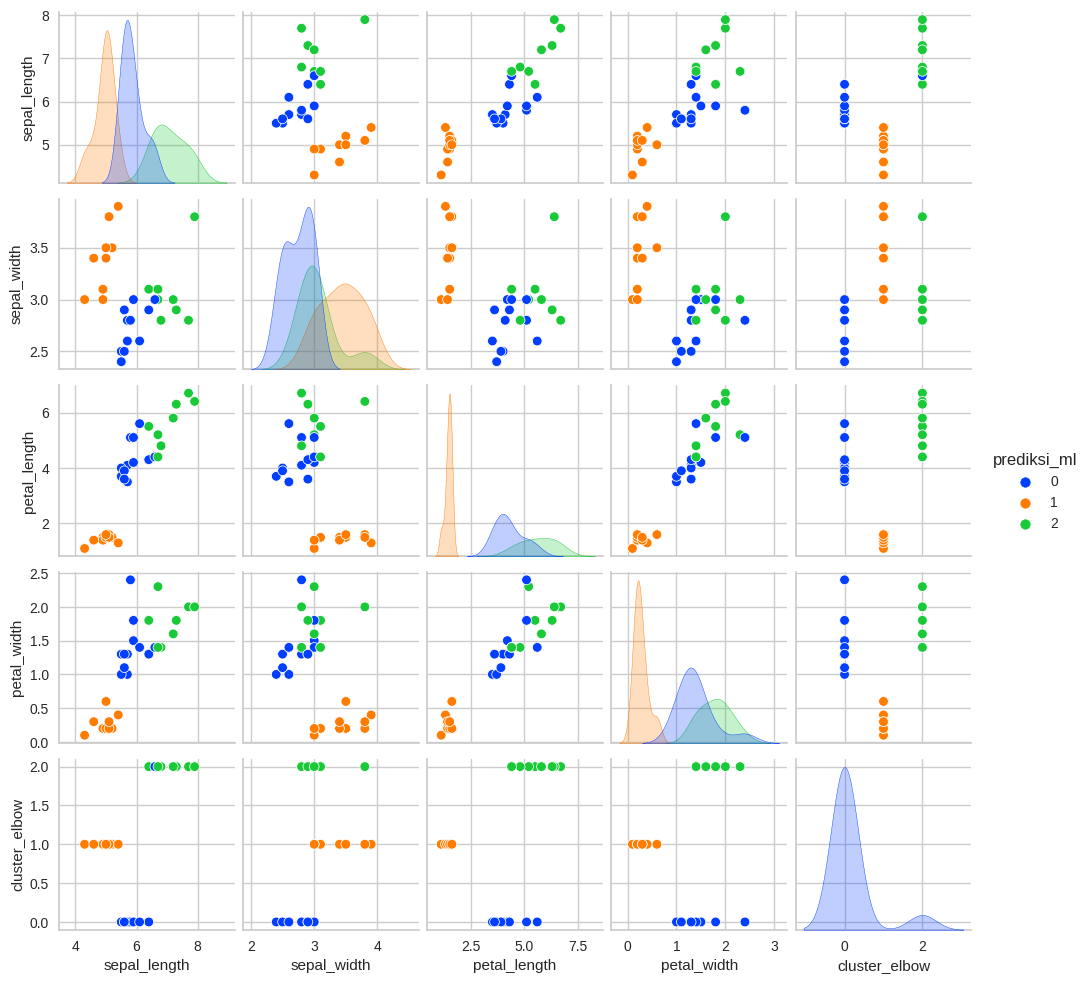

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=test, x='petal_length', y='petal_width', hue='prediksi_ml')

Compared to the anatator

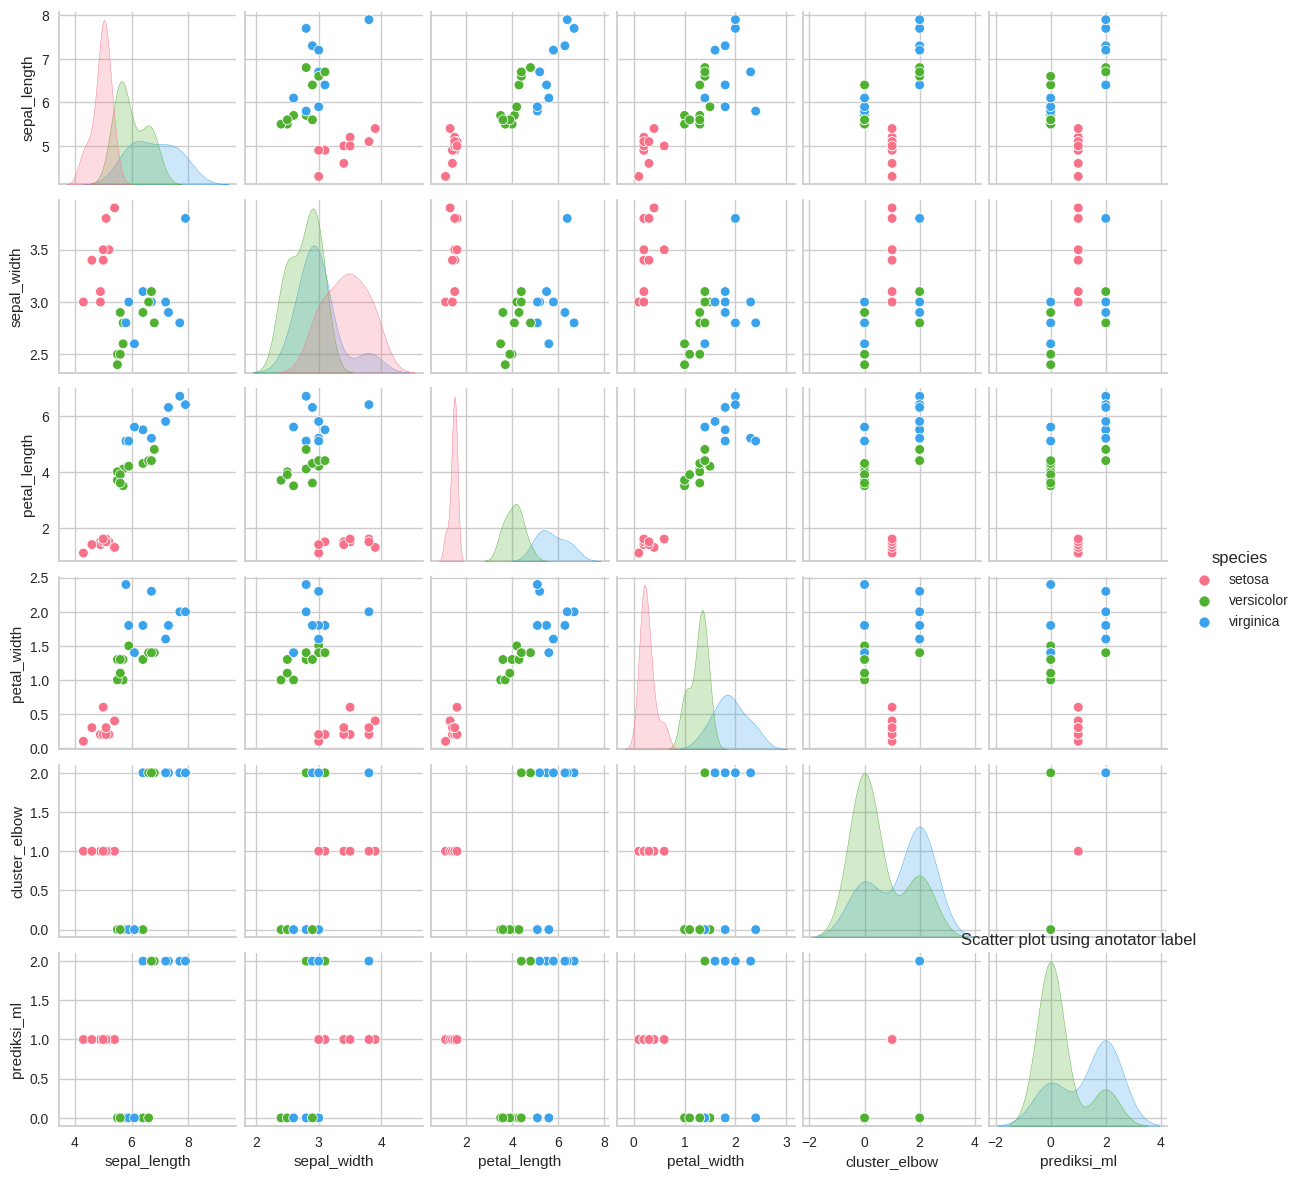

In [ ]:
sns.pairplot(data=test, hue="species", palette="husl", height=2, aspect=1)
plt.title('Scatter plot using anotator label')
plt.show()

According to the visualization above on the data test, it shows that there are indeed some points mixed to other species, however, the value of prediksi_ml prediction has classified amongst the species. It indicates that the prediction has shown good output.

## 5. Bonus (Point 20) : Tulis Interpretasi dan Insight di tiap model + evaluasi model dan EDA dengan alasan kalian.

Multiclass methods illustrate:
1. Logistic regression: accuracy between test and train data merely 3%
2. SVM: accuracy between test and train data at 6%
3. Naive Bayes: accuracy between test and train data at 15%
4. KNN:accuracy between test and train data merely at 6%
Hence, the best multiclass method is Logistic Regression

Evaluation Models depict:
1. The distribution data between three different species tends to be more central tendency, both in the beginning (before implemented feature engineering) and at the end of evaluation (after the best multiclass method chosen)
2. Although the spread of species in the evaluation stage (after the best multiclass method chosen) is mixed, however, it indicates minor output and the distribution of prediksi_ml prediction has good outcomes regarding multiclass prediction.

## Link postingan linkedin :